In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import scipy
import statsmodels.api as sm

In [4]:
try:
    path = "C:\\Users\\mayan\\Downloads\\WA_Fn-UseC_-HR-Employee-Attrition.csv"
    df = pd.read_csv(path)
except Exception as e :
    print(f"Data can't be loaded. error :{e}")

In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

i am Sachin


In [8]:
print(f"There are {df.isnull().sum().sum()} null values in the dataset.\nThere are {df.duplicated().sum()} duplicates in the dataset.")

There are 0 null values in the dataset.
There are 0 duplicates in the dataset.


In [9]:
df.columns = df.columns.str.lower()

In [10]:
def Info():
    total_drops = 0
    for col in df.columns:
        if df[col].nunique() < 10:
            print(df[col].name)
            print(df[col].unique())
            if df[col].nunique() <= 1:
                total_drops += 1
                print(f"Removing {col} from the data frame.")
                df.drop(columns=col, inplace= True)

    print(f"total droped col = {total_drops}")
                

Info()

attrition
['Yes' 'No']
businesstravel
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
department
['Sales' 'Research & Development' 'Human Resources']
education
[2 1 4 3 5]
educationfield
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
employeecount
[1]
Removing employeecount from the data frame.
environmentsatisfaction
[2 3 4 1]
gender
['Female' 'Male']
jobinvolvement
[3 2 4 1]
joblevel
[2 1 3 4 5]
jobrole
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
jobsatisfaction
[4 2 3 1]
maritalstatus
['Single' 'Married' 'Divorced']
over18
['Y']
Removing over18 from the data frame.
overtime
['Yes' 'No']
performancerating
[3 4]
relationshipsatisfaction
[1 4 2 3]
standardhours
[80]
Removing standardhours from the data frame.
stockoptionlevel
[0 1 3 2]
trainingtimeslastyear
[0 3 2 5 1 4 6]
worklifebalance
[1 3 2 4]
t

In [11]:
df.sample(5)

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
937,39,No,Travel_Rarely,412,Research & Development,13,4,Medical,1307,3,Female,94,2,4,Manager,2,Divorced,17123,17334,6,Yes,13,3,4,2,21,4,3,19,9,15,2
79,46,No,Travel_Rarely,945,Human Resources,5,2,Medical,103,2,Male,80,3,2,Human Resources,2,Divorced,5021,10425,8,Yes,22,4,4,1,16,2,3,4,2,0,2
762,26,Yes,Travel_Frequently,342,Research & Development,2,3,Life Sciences,1053,1,Male,57,3,1,Research Scientist,1,Married,2042,15346,6,Yes,14,3,2,1,6,2,3,3,2,1,2
1090,29,No,Travel_Rarely,441,Research & Development,8,1,Other,1544,3,Female,39,1,2,Healthcare Representative,1,Married,9715,7288,3,No,13,3,3,1,9,3,3,7,7,0,7
712,33,No,Travel_Rarely,461,Research & Development,13,1,Life Sciences,995,2,Female,53,3,1,Research Scientist,4,Single,3452,17241,3,No,18,3,1,0,5,4,3,3,2,0,2


In [12]:
df.to_csv("hr_manages.csv", index= True)

In [13]:
df.head()

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [14]:
col_obj = df.select_dtypes(include="object")
df.columns

Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'department',
       'distancefromhome', 'education', 'educationfield', 'employeenumber',
       'environmentsatisfaction', 'gender', 'hourlyrate', 'jobinvolvement',
       'joblevel', 'jobrole', 'jobsatisfaction', 'maritalstatus',
       'monthlyincome', 'monthlyrate', 'numcompaniesworked', 'overtime',
       'percentsalaryhike', 'performancerating', 'relationshipsatisfaction',
       'stockoptionlevel', 'totalworkingyears', 'trainingtimeslastyear',
       'worklifebalance', 'yearsatcompany', 'yearsincurrentrole',
       'yearssincelastpromotion', 'yearswithcurrmanager'],
      dtype='object')

In [15]:
df["employeenumber"].nunique()

1470

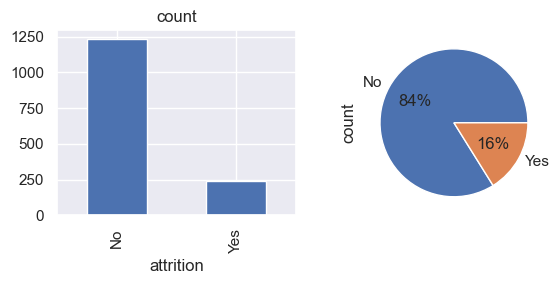

In [16]:

fig  , ax = plt.subplots(1,2, figsize=(6,3) )
df["attrition"].value_counts().plot(kind= "bar",subplots= True,  ax = ax[0])
df["attrition"].value_counts().plot(kind= "pie" , autopct = "%1.0f%%"  , subplots= True , ax = ax[1])
plt.tight_layout()
plt.show()

In [17]:
x = df.groupby("gender")["attrition"].value_counts()
print(x.values)
print(x)

[501  87 732 150]
gender  attrition
Female  No           501
        Yes           87
Male    No           732
        Yes          150
Name: count, dtype: int64


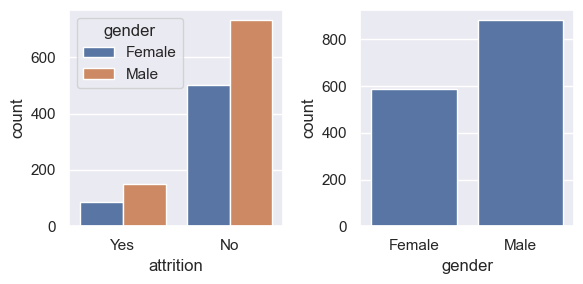

In [18]:

fig , ax = plt.subplots(1,2 , figsize= (6,3))
sns.countplot(x = df.attrition , hue = df.gender , data = df , ax = ax[0])
sns.countplot(x = df.gender , ax = ax[1])
plt.tight_layout()
plt.show()

we have 1470 employess in compnay out of which 16% of employess has resigned. we will find out why they left and in future who will resigns.
The plot shows mens have high value of resign as compared to the womens , also we have more mens force comparied to womens force.

In [19]:
df.groupby(["gender", "attrition"])['businesstravel'].value_counts()

gender  attrition  businesstravel   
Female  No         Travel_Rarely        368
                   Travel_Frequently     87
                   Non-Travel            46
        Yes        Travel_Rarely         54
                   Travel_Frequently     30
                   Non-Travel             3
Male    No         Travel_Rarely        519
                   Travel_Frequently    121
                   Non-Travel            92
        Yes        Travel_Rarely        102
                   Travel_Frequently     39
                   Non-Travel             9
Name: count, dtype: int64

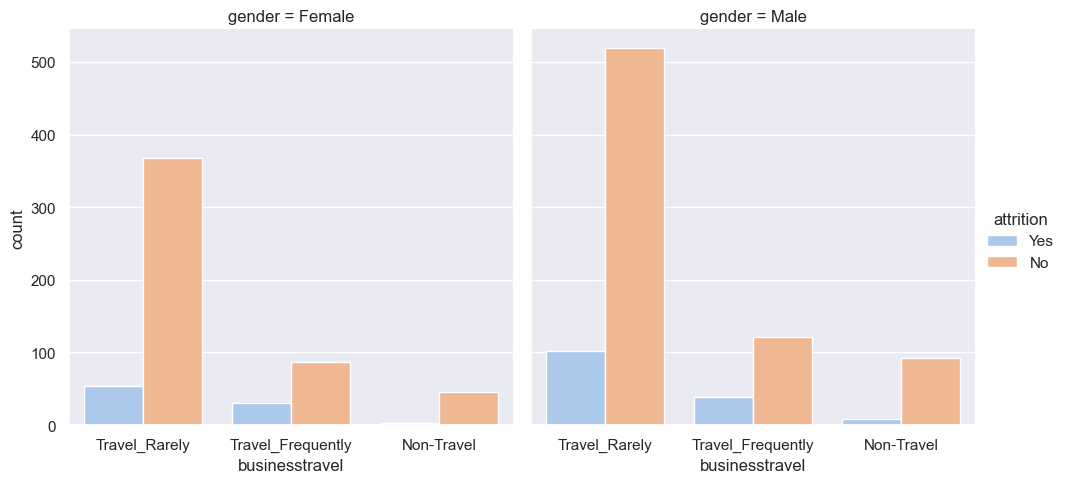

In [20]:
sns.catplot(x=df.businesstravel, hue=df.attrition, col=df.gender, data=df, kind='count', palette='pastel')
plt.show()

Business travel has very noticeable afects on the attration but females have higher rate of attration if the job post have travels.


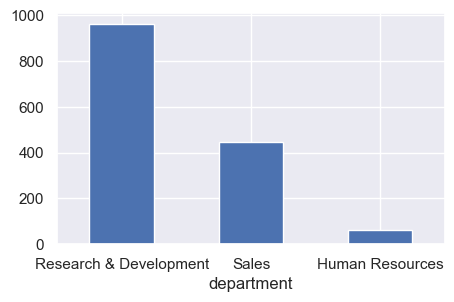

In [21]:
df["department"].value_counts().plot(kind = "bar" ,figsize= (5,3))
plt.xticks(rotation = 0)
plt.show()

In [22]:
df.groupby("attrition")["department"].value_counts()

attrition  department            
No         Research & Development    828
           Sales                     354
           Human Resources            51
Yes        Research & Development    133
           Sales                      92
           Human Resources            12
Name: count, dtype: int64

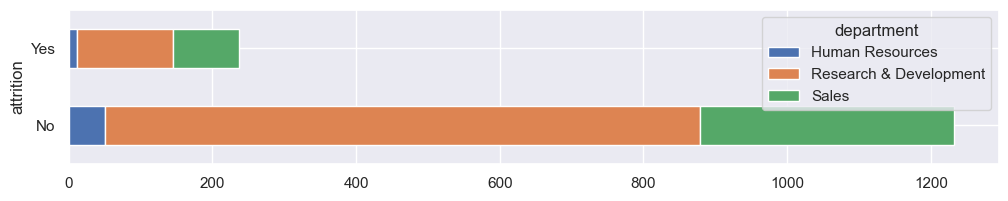

In [23]:
df.groupby("attrition")["department"].value_counts().unstack().plot(kind = "barh" , stacked= True, figsize= (12,2))
plt.show()

<Axes: ylabel='Density'>

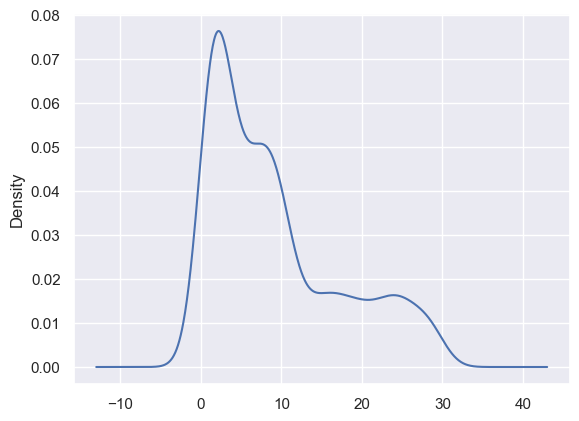

In [24]:
df["distancefromhome"].plot(kind = "kde")

<Axes: ylabel='jobrole'>

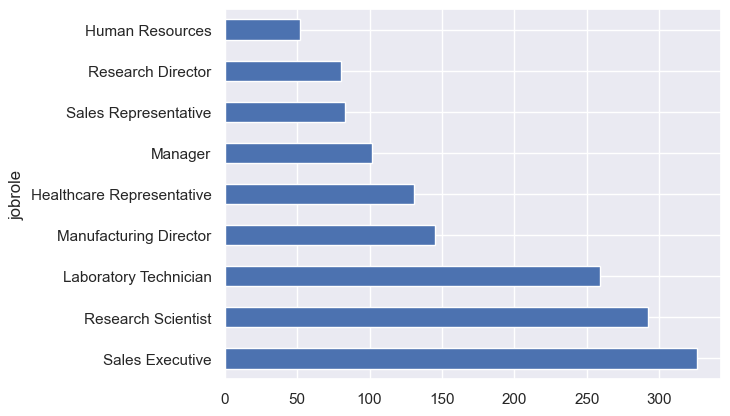

In [25]:
df["jobrole"].value_counts().plot(kind = "barh")

<Axes: xlabel='count', ylabel='jobrole'>

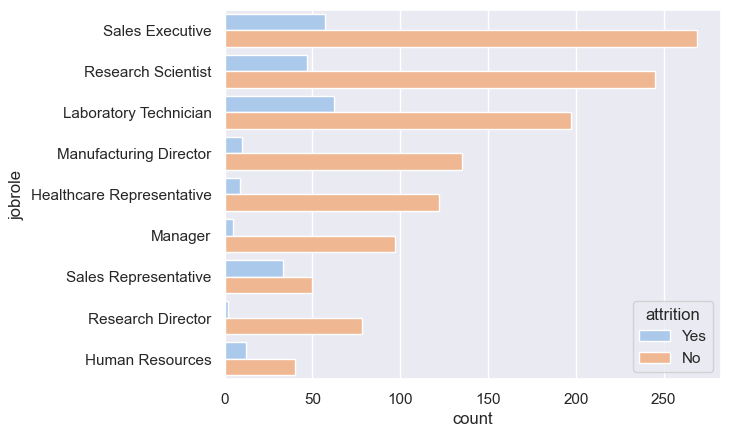

In [26]:
sns.countplot(data = df , y  = df.jobrole , hue = df.attrition , palette= "pastel")

<Axes: xlabel='count', ylabel='jobrole'>

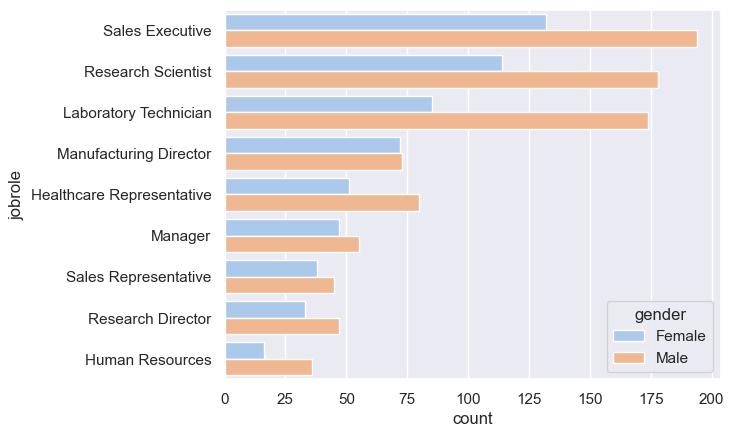

In [27]:
sns.countplot(data = df , y = df.jobrole , hue = df.gender , palette= "pastel")

In [28]:
df.sample(5)

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
1256,38,No,Travel_Frequently,594,Research & Development,2,2,Medical,1760,3,Female,75,2,1,Laboratory Technician,2,Married,2468,15963,4,No,14,3,2,1,9,4,2,6,1,0,5
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,No,12,3,1,0,6,3,4,4,3,1,2
238,32,No,Travel_Rarely,1401,Sales,4,2,Life Sciences,330,3,Female,56,3,1,Sales Representative,2,Married,3931,20990,2,No,11,3,1,1,6,5,3,4,3,1,2
40,35,No,Travel_Rarely,464,Research & Development,4,2,Other,53,3,Male,75,3,1,Laboratory Technician,4,Divorced,1951,10910,1,No,12,3,3,1,1,3,3,1,0,0,0
166,41,No,Travel_Rarely,465,Research & Development,14,3,Life Sciences,227,1,Male,56,3,1,Research Scientist,3,Divorced,2451,4609,4,No,12,3,1,1,13,2,3,9,8,1,8


In [62]:
for cols in df.columns:
    if df[cols].nunique() <10:
      print(f"{cols} : {df[cols].nunique()} unique values")
      print(df[cols].unique())

attrition : 2 unique values
['Yes' 'No']
businesstravel : 3 unique values
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
department : 3 unique values
['Sales' 'Research & Development' 'Human Resources']
education : 5 unique values
[2 1 4 3 5]
educationfield : 6 unique values
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
environmentsatisfaction : 4 unique values
[2 3 4 1]
gender : 2 unique values
['Female' 'Male']
jobinvolvement : 4 unique values
[3 2 4 1]
joblevel : 5 unique values
[2 1 3 4 5]
jobrole : 9 unique values
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
jobsatisfaction : 4 unique values
[4 2 3 1]
maritalstatus : 3 unique values
['Single' 'Married' 'Divorced']
overtime : 2 unique values
['Yes' 'No']
performancerating : 2 unique values
[3 4]
relationshipsatisfaction : 4 unique values
[1 4 2 

In [29]:
col_drop = ['employeenumber']
df = df.drop(columns= col_drop , axis= 1)

In [30]:
from sklearn.model_selection import train_test_split
x = df.drop(columns= "attrition" , axis= 1)
y = df.attrition
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size = 0.2)

In [31]:
df['overtime'].unique()

array(['Yes', 'No'], dtype=object)

In [32]:
from sklearn.preprocessing import LabelEncoder , OrdinalEncoder , OneHotEncoder , StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
col_obj_ord = ['businesstravel' , 'educationfield' , 'jobrole' , 'maritalstatus']
col_obj_onehot = ['department' ,'gender' ,'overtime']
num_col_countinus = ["age","dailyrate","distancefromhome","hourlyrate","monthlyincome","monthlyrate",
                     "numcompaniesworked","percentsalaryhike","totalworkingyears","trainingtimeslastyear"
                     ,"yearsatcompany","yearsincurrentrole","yearssincelastpromotion","yearswithcurrmanager"]
num_col_oridinal =  ["education","environmentsatisfaction","jobinvolvement","joblevel","jobsatisfaction",
                     "performancerating","relationshipsatisfaction","stockoptionlevel","worklifebalance"]

preprocessor = ColumnTransformer(
    transformers=[
        ('cat_col_ord' , OrdinalEncoder(), col_obj_ord),
        ("cat_col_one" , OneHotEncoder(), col_obj_onehot),
        ("num_col_countinus" , StandardScaler() , num_col_countinus),
        ("num_col_oridinal" , "passthrough" , num_col_oridinal) 
    ]
)

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn._config import set_config
set_config(display='diagram')
clf = Pipeline(steps = [
    ('preprocessor' , preprocessor),
    ('classifier' , RandomForestClassifier())])
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_col_ord',
                                                  OrdinalEncoder(),
                                                  ['businesstravel',
                                                   'educationfield', 'jobrole',
                                                   'maritalstatus']),
                                                 ('cat_col_one',
                                                  OneHotEncoder(),
                                                  ['department', 'gender',
                                                   'overtime']),
                                                 ('num_col_countinus',
                                                  StandardScaler(),
                                                  ['age', 'dailyrate',
                                                   'distancefromhome',
                                                   'hourlyrate',
                                                   'monthlyincome',
                                                   'monthlyrate',
                                                   'numc...
                                                   'trainingtimeslastyear',
                                                   'yearsatcompany',
                                                   'yearsincurrentrole',
                                                   'yearssincelastpromotion',
                                                   'yearswithcurrmanager']),
                                                 ('num_col_oridinal',
                                                  'passthrough',
                                                  ['education',
                                                   'environmentsatisfaction',
                                                   'jobinvolvement', 'joblevel',
                                                   'jobsatisfaction',
                                                   'performancerating',
                                                   'relationshipsatisfaction',
                                                   'stockoptionlevel',
                                                   'worklifebalance'])])),
                ('classifier', RandomForestClassifier())])

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , roc_auc_score 

models = [
    {'model': LogisticRegression(max_iter = 100), 'name': 'Logistic Regression'},
    {'model': SVC(), 'name': 'Support Vector Machine'}, 
    {'model': DecisionTreeClassifier(), 'name': 'Decision Tree'},
    {'model': RandomForestClassifier(), 'name': 'Random Forest'} 
]


for m in models:
    clf = Pipeline(steps = [
        ('preprocessor' , preprocessor),
        ('classifier' , m['model'])])
    clf.fit(x_train , y_train)
    y_pred = clf.predict(x_test)
    per = accuracy_score(y_test , y_pred)
    print(f"the accuracy of the model {m['name']} is {per*100:.2f}%")


c:\Users\mayan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


the accuracy of the model Logistic Regression is 86.73%
the accuracy of the model Support Vector Machine is 87.41%
the accuracy of the model Decision Tree is 76.19%
the accuracy of the model Random Forest is 86.73%


In [35]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = [
    {'classifier' : [RandomForestClassifier()],
     'classifier__criterion' : ['gini', 'entropy', 'log_loss'],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]} , 
    {'classifier': [LogisticRegression(max_iter=100)],
     'classifier__C': [0.1, 1.0, 10.0],
     'classifier__solver': ['liblinear', 'saga'],
     'classifier__penalty': ['l1', 'l2']},
     {'classifier': [SVC()],
        'classifier__C': [0.1, 1.0, 10.0],
        'classifier__kernel': ['linear', 'rbf', 'poly'],
        'classifier__gamma': ['scale', 'auto']}
]

grid_search = RandomizedSearchCV(clf , param_grid , cv = 5 , n_iter= 10 , n_jobs= -1 , scoring = 'accuracy' , verbose = 2)
best_model = grid_search.fit(x_train , y_train)
print(f"the best model is {best_model.best_params_}")
print(f"the best score is {best_model.best_score_*100:.2f}%")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
the best model is {'classifier__solver': 'saga', 'classifier__penalty': 'l1', 'classifier__C': 10.0, 'classifier': LogisticRegression()}
the best score is 87.24%


c:\Users\mayan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [36]:
clf = Pipeline(steps = [
    ('preprocessor' , preprocessor),
    ('classifier' , LogisticRegression(solver= 'saga' , penalty  = 'l1' ,  C = 1.0 , max_iter=2000))])

In [37]:
attrition_model =  clf.fit(x_train , y_train)
y_pred = attrition_model.predict(x_test)
from sklearn.metrics import accuracy_score
per = accuracy_score(y_test , y_pred)
print(f"the accuracy of the model is {per*100:.2f}%")


the accuracy of the model is 86.73%


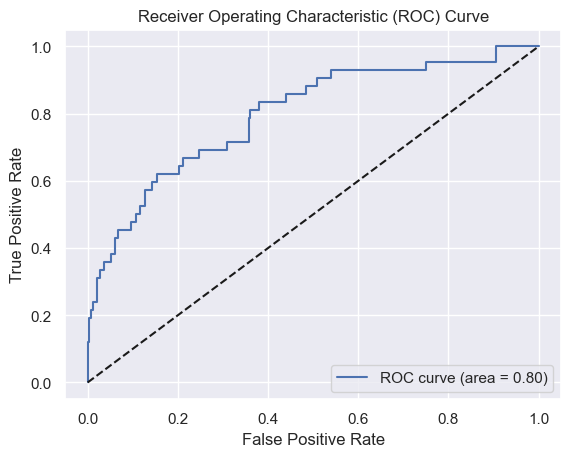

In [38]:
y_prob = attrition_model.predict_proba(x_test)[:,1]
from sklearn.metrics import roc_auc_score , roc_curve
fpr , tpr , thresholds = roc_curve(y_test.map({'Yes':1 , 'No':0}) , y_prob)
plt.plot(fpr , tpr , label = "ROC curve (area = %0.2f)" % roc_auc_score(y_test.map({'Yes':1 , 'No':0}) , y_prob))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


learning curve shows model performance vs. training set size.


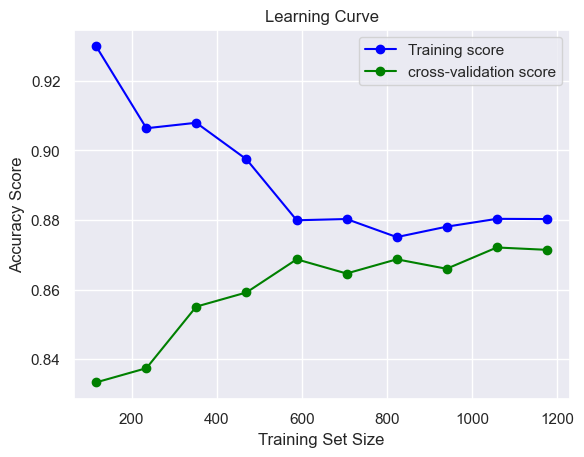

In [42]:
from sklearn.model_selection import learning_curve
train_size , train_score , test_score = learning_curve(attrition_model , x , y , cv = 5 , n_jobs= -1 , scoring= 'accuracy' , train_sizes= np.linspace(0.1, 1.0, 10))
train_mean = np.mean(train_score , axis= 1)
test_mean = np.mean(test_score , axis = 1)

plt.plot(train_size ,train_mean , 'o-' , label = "Training score" , color = 'blue' )
plt.plot(train_size ,test_mean , 'o-' , label = "cross-validation score" , color = 'green' )
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.title("Learning Curve")
plt.legend(loc = 'best')
plt.show()

In [43]:
from joblib import dump
dump(attrition_model , 'attrition_model.pkl')

['attrition_model.pkl']

In [51]:
coef = attrition_model.named_steps['classifier'].coef_[0]
feature_names = attrition_model.named_steps['preprocessor'].get_feature_names_out()

feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': coef, 'abs_importance': abs(coef)})
feature_importance.sort_values(by='abs_importance', ascending=False, inplace=True)
feature_importance


,Feature,Importance,abs_importance
10,cat_col_one__overtime_Yes,1.781513,1.781513
5,cat_col_one__department_Research & Development,-0.683448,0.683448
23,num_col_countinus__yearssincelastpromotion,0.623329,0.623329
22,num_col_countinus__yearsincurrentrole,-0.555452,0.555452
3,cat_col_ord__maritalstatus,0.517698,0.517698
27,num_col_oridinal__jobinvolvement,-0.495057,0.495057
17,num_col_countinus__numcompaniesworked,0.430959,0.430959
6,cat_col_one__department_Sales,0.422249,0.422249
29,num_col_oridinal__jobsatisfaction,-0.408110,0.408110
11,num_col_countinus__age,-0.406292,0.406292


In [59]:
print(len(x_train.columns))

30


In [57]:
coef = attrition_model.named_steps['classifier']
features = attrition_model.feature_names_in_

print(coef)

LogisticRegression(max_iter=2000, penalty='l1', solver='saga')
